# 1. Life Expectancy Prediction Assignment
This notebook covers the implementation of OLS and Logit regression models using the 'Life Expectancy' dataset.




## 2. Methodology

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

## Load the Dataset

In [49]:
# prompt: code for connecting to drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Load the dataset
file_path = '/content/drive/MyDrive/Manohar_Projects/FinalProject/updated_life_expectancy_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01               71.279624         65.0      1154   19.1   
1     0.01               73.523582         62.0       492   18.6   
2     0.01               73.219243         64.0       430   18.1   
3     0.01               78.184215         67.0      2787   17.6   
4     0.01                7.097109         68.0      3013   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   

          GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                 17.3   
1  612.696514    327582.0                   17.5                 17.5   
2  631.744976  31731688.0                   17.7                 17.7   
3  669.959000   3696958.0                   17.9                 18.0   
4   63.537231   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling Life_expectancy_category  
0                            0.479       10.1                      Low  
1                            0.476       10.0                      Low  
2                            0.470        9.9                      Low  
3                            0.463        9.8                      Low  
4                            0.454        9.5                      Low

## 2.1 Data Preprocessing
We will drop rows with missing values for simplicity, though in practice, you may want to handle missing data more effectively.

In [51]:
df= df.info() # it will give the information for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [52]:
# prompt: code for connecting to drive

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Manohar_Projects/FinalProject/updated_life_expectancy_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

# Print information about the DataFrame (do not reassign df)
df.info() # it will give the information for all columns

# Calculate and display the sum of null values in each column
df.isna().sum() # it will give the sum of null values in each column

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deat

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life_expectancy_category             0
dtype: int64

In [53]:
df.dropna(inplace=True) # it will drop the rows with null values
df.info() # it will give the information for all columns

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Status                           1649 non-null   object 
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure        

In [54]:
df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life_expectancy_category            object
dtype: object

In [55]:
# shape of the dataaset
df.shape

(1649, 22)

In [56]:
# prompt: give me the code to see full rows in df.head()
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01               71.279624         65.0      1154   19.1   
1     0.01               73.523582         62.0       492   18.6   
2     0.01               73.219243         64.0       430   18.1   
3     0.01               78.184215         67.0      2787   17.6   
4     0.01                7.097109         68.0      3013   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   

          GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                 17.3   
1  612.696514    327582.0                   17.5                 17.5   
2  631.744976  31731688.0                   17.7                 17.7   
3  669.959000   3696958.0                   17.9                 18.0   
4   63.537231   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling Life_expectancy_category  
0                            0.479       10.1                      Low  
1                            0.476       10.0                      Low  
2                            0.470        9.9                      Low  
3                            0.463        9.8                      Low  
4                            0.454        9.5                      Low

In [57]:
# prompt: give me the python code to convert all the float datatype variables into .2 decimal

# Assuming 'df' is your DataFrame
# Iterate through each column
for col in df.columns:
    # Check if the column's data type is float
    if pd.api.types.is_float_dtype(df[col]):
        # Round the float values to 2 decimal places
        df[col] = df[col].round(2)

In [58]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01                   71.28         65.0      1154   19.1   
1     0.01                   73.52         62.0       492   18.6   
2     0.01                   73.22         64.0       430   18.1   
3     0.01                   78.18         67.0      2787   17.6   
4     0.01                    7.10         68.0      3013   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   

      GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.26  33736494.0                   17.2                 17.3   
1  612.70    327582.0                   17.5                 17.5   
2  631.74  31731688.0                   17.7                 17.7   
3  669.96   3696958.0                   17.9                 18.0   
4   63.54   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling Life_expectancy_category  
0                             0.48       10.1                      Low  
1                             0.48       10.0                      Low  
2                             0.47        9.9                      Low  
3                             0.46        9.8                      Low  
4                             0.45        9.5                      Low

In [59]:
# Mean of all columnss
columns_above_12 = {}  # Initialize as a dictionary
numerical_col = []
object_col = []
for col in df.columns:
  if df[col].dtype== int or df[col].dtype==float: # it will give the int datatype columns
    numerical_col.append(col)
    mean_val = df[col].mean()
    print(f"Mean of {col} is {mean_val}")
    if mean_val > 12:
       columns_above_12[col] = mean_val # Assign using key-value pairs
  if df[col].dtype== object: # it will give the object datatype columns
    object_col.append(col)
    print(f"Mode of {col} is {df[col].mode()}")

Mean of Year is 2007.8405093996362
Mode of Status is 0    Developing
Name: Status, dtype: object
Mean of Life expectancy  is 69.3023044269254
Mean of Adult Mortality is 168.2152819890843
Mean of infant deaths is 32.55306246209824
Mean of Alcohol is 4.5331958762886595
Mean of percentage expenditure is 698.9734930260764
Mean of Hepatitis B is 79.21770770163735
Mean of Measles  is 2224.4942389326866
Mean of  BMI  is 38.12862340812614
Mean of under-five deaths  is 44.22013341419042
Mean of Polio is 83.56458459672528
Mean of Total expenditure is 5.955924802910855
Mean of Diphtheria  is 84.155245603396
Mean of  HIV/AIDS is 1.9838690115221345
Mean of GDP is 5566.031976955731
Mean of Population is 14653625.889484538
Mean of  thinness  1-19 years is 4.8506367495451785
Mean of  thinness 5-9 years is 4.9077622801698
Mean of Income composition of resources is 0.6315403274711946
Mean of Schooling is 12.11989084293511
Mode of Life_expectancy_category is 0    Low
Name: Life_expectancy_category, dtype

In [60]:
columns_above_12

{'Year': 2007.8405093996362,
 'Life expectancy ': 69.3023044269254,
 'Adult Mortality': 168.2152819890843,
 'infant deaths': 32.55306246209824,
 'percentage expenditure': 698.9734930260764,
 'Hepatitis B': 79.21770770163735,
 'Measles ': 2224.4942389326866,
 ' BMI ': 38.12862340812614,
 'under-five deaths ': 44.22013341419042,
 'Polio': 83.56458459672528,
 'Diphtheria ': 84.155245603396,
 'GDP': 5566.031976955731,
 'Population': 14653625.889484538,
 'Schooling': 12.11989084293511}

In [61]:
df['percentage expenditure'] = df['percentage expenditure'].abs() # it will give the absoulte values
df['percentage expenditure'] = df['percentage expenditure'].astype(int) # change float dtype to int
df['percentage expenditure'].head()

0    71
1    73
2    73
3    78
4     7
Name: percentage expenditure, dtype: int64

In [62]:
# Count the number of zeros in the column
df_shape=df.shape
col_zeros=[]
for col in columns_above_12:
    zero_count = (df[col] == 0).sum()
    print(f"Out of {df_shape[0]} rows the data column {col} has these may zeros: {zero_count}")
    if zero_count > 0:
       col_zeros.append(col)
print("=="*50)
print(f"The columns with the zeros {col_zeros}")

Out of 1649 rows the data column Year has these may zeros: 0
Out of 1649 rows the data column Life expectancy  has these may zeros: 0
Out of 1649 rows the data column Adult Mortality has these may zeros: 0
Out of 1649 rows the data column infant deaths has these may zeros: 395
Out of 1649 rows the data column percentage expenditure has these may zeros: 20
Out of 1649 rows the data column Hepatitis B has these may zeros: 0
Out of 1649 rows the data column Measles  has these may zeros: 554
Out of 1649 rows the data column  BMI  has these may zeros: 0
Out of 1649 rows the data column under-five deaths  has these may zeros: 353
Out of 1649 rows the data column Polio has these may zeros: 0
Out of 1649 rows the data column Diphtheria  has these may zeros: 0
Out of 1649 rows the data column GDP has these may zeros: 0
Out of 1649 rows the data column Population has these may zeros: 0
Out of 1649 rows the data column Schooling has these may zeros: 0
The columns with the zeros ['infant deaths', 

In [63]:
from scipy.stats import shapiro

# Define thresholds
normality_p_threshold = 0.05  # p-value threshold for normality test
skew_threshold = 0.5  # Threshold to consider skewness significant

# Initialize results
normal_columns = []
skewed_columns = []

# Check each numerical column
for col in col_zeros:
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[col])
    skewness = df[col].skew()

    # Classify based on results
    if p_value > normality_p_threshold:  # p > 0.05 indicates normality
        normal_columns.append(col)
    elif abs(skewness) > skew_threshold:  # Significant skew
        skewed_columns.append(col)

# Print results
print("Normally Distributed Columns:", normal_columns)
print("Skewed Columns:", skewed_columns)


Normally Distributed Columns: []
Skewed Columns: ['infant deaths', 'percentage expenditure', 'Measles ', 'under-five deaths ']


In [64]:
# Visualize Normally Distributed Columns
from scipy.stats import shapiro
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

for col in normal_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram: {col} (Normally Distributed)')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col} (Normally Distributed)')

    plt.tight_layout()
    plt.show()


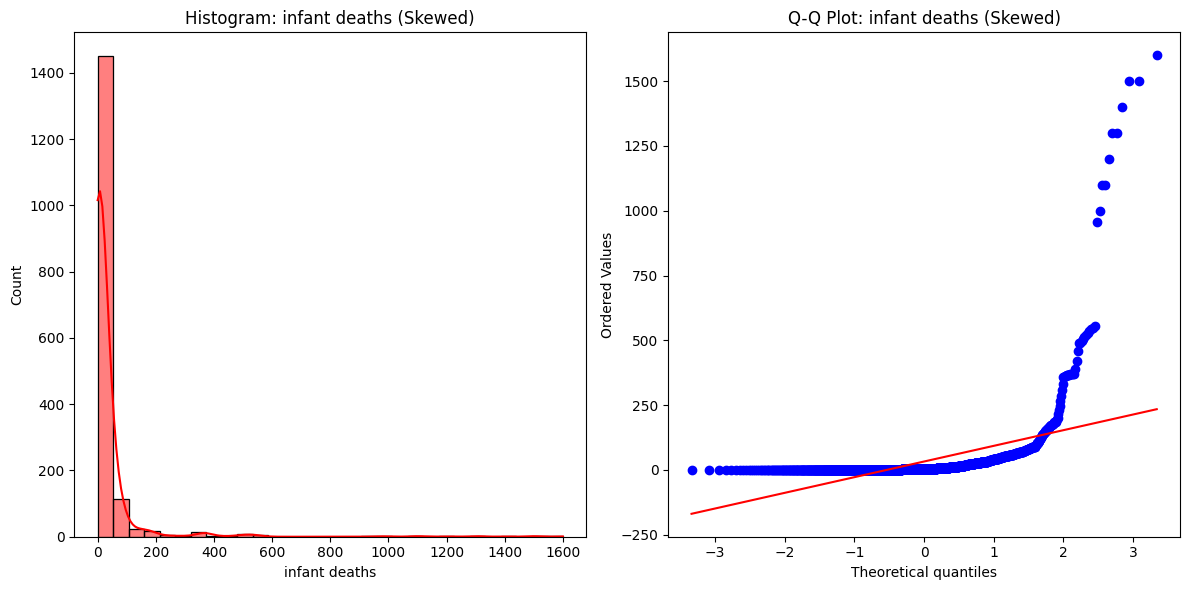

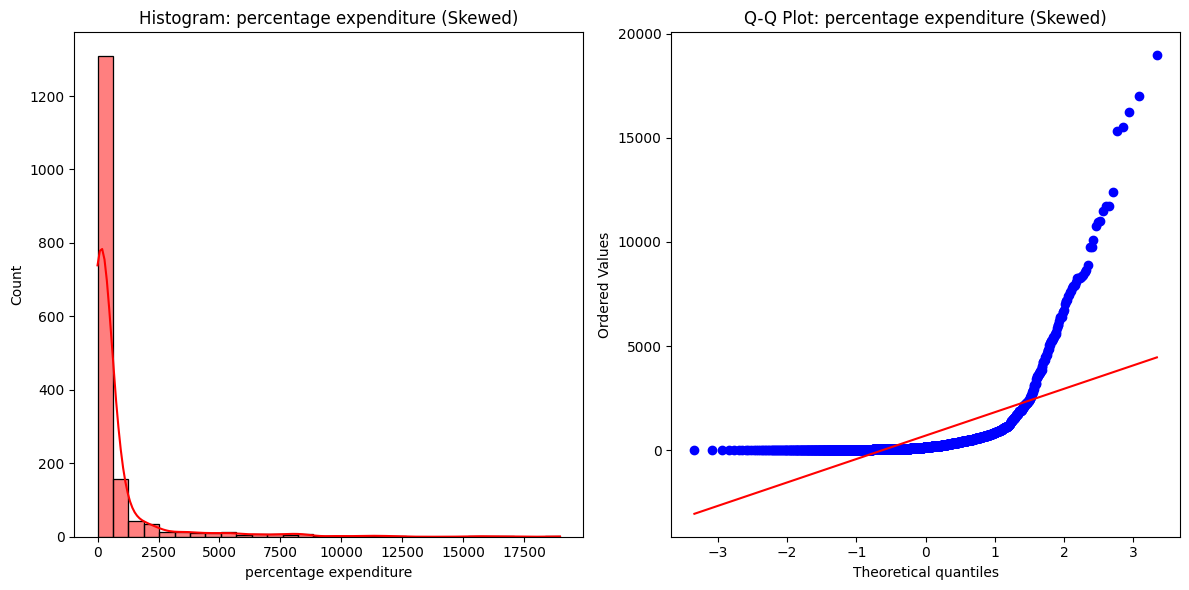

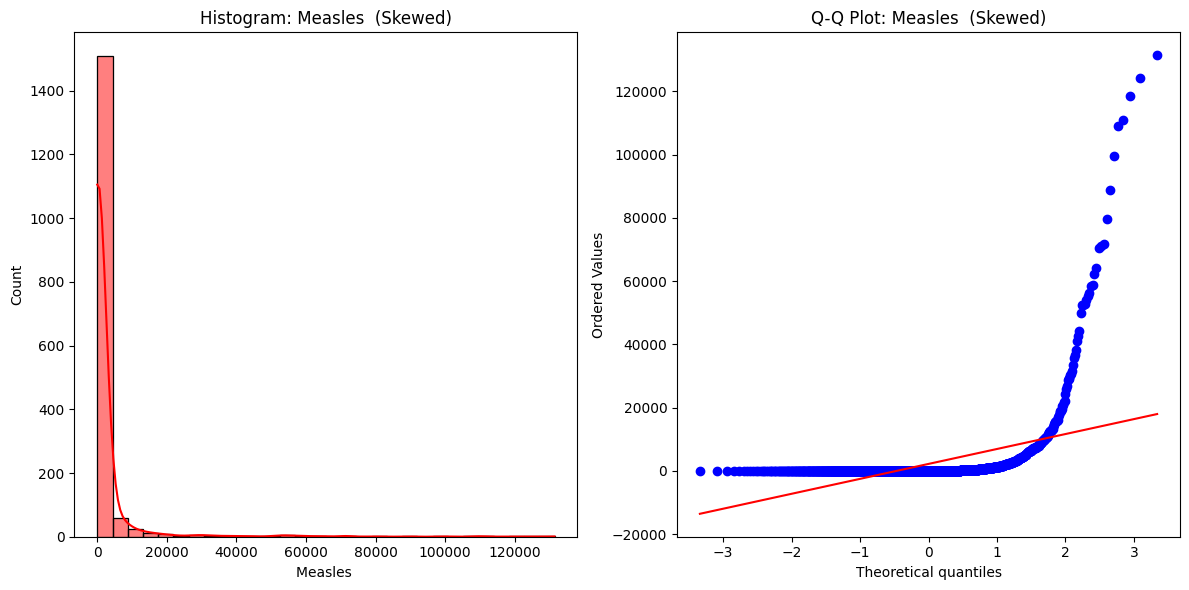

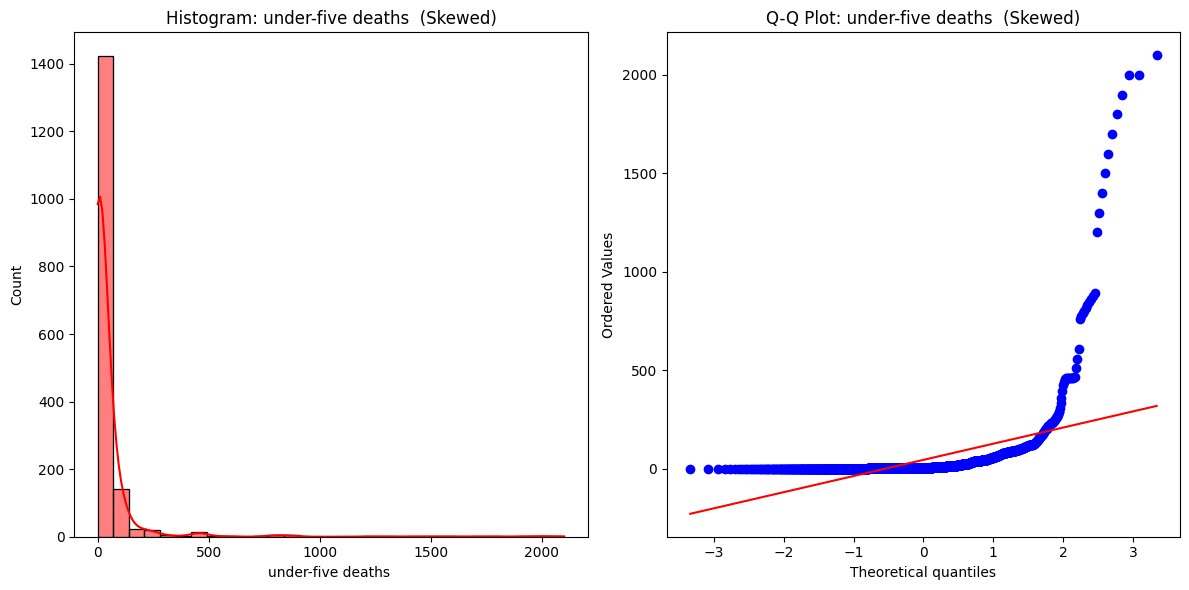

In [65]:
# Visualize Skewed Columns
for col in skewed_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='red')
    plt.title(f'Histogram: {col} (Skewed)')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col} (Skewed)')

    plt.tight_layout()
    plt.show()

In [66]:
# Assuming 'df' is your DataFrame and 'col_zeros' contains the columns with zeros
for col in col_zeros:
    # Calculate the median of the column, excluding zeros
    median_val = df[df[col] != 0][col].median()

    # Replace zeros with the median
    df[col] = df[col].replace(0, median_val)

In [67]:
for col in col_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"Out of {df_shape[0]} rows the data column {col} has these may zeros: {zero_count}")

Out of 1649 rows the data column infant deaths has these may zeros: 0
Out of 1649 rows the data column percentage expenditure has these may zeros: 0
Out of 1649 rows the data column Measles  has these may zeros: 0
Out of 1649 rows the data column under-five deaths  has these may zeros: 0


In [68]:
df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0     0.01                      71         65.0      1154   19.1   
1     0.01                      73         62.0       492   18.6   
2     0.01                      73         64.0       430   18.1   
3     0.01                      78         67.0      2787   17.6   
4     0.01                       7         68.0      3013   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  83    6.0               8.16         65.0        0.1   
1                  86   58.0               8.18         62.0        0.1   
2                  89   62.0               8.13         64.0        0.1   
3                  93   67.0               8.52         67.0        0.1   
4                  97   68.0               7.87         68.0        0.1   

      GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.26  33736494.0                   17.2                 17.3   
1  612.70    327582.0                   17.5                 17.5   
2  631.74  31731688.0                   17.7                 17.7   
3  669.96   3696958.0                   17.9                 18.0   
4   63.54   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling Life_expectancy_category  
0                             0.48       10.1                      Low  
1                             0.48       10.0                      Low  
2                             0.47        9.9                      Low  
3                             0.46        9.8                      Low  
4                             0.45        9.5                      Low

In [69]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      34.469375   
std       4.087711          8.796834       125.310417     120.378027   
min    2000.000000         44.000000         1.000000       1.000000   
25%    2005.000000         64.400000        77.000000       3.000000   
50%    2008.000000         71.700000       148.000000       8.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              700.298969    79.217708    2267.161310   
std       4.029189             1758.590759    25.604664   10076.560043   
min       0.010000                1.000000     2.000000       1.000000   
25%       0.810000               40.000000    74.000000      44.000000   
50%       3.790000              150.000000    89.000000     127.000000   
75%       7.340000              509.000000    96.000000     373.000000   
max      17.870000            18961.000000    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           46.146756    83.564585           5.955925   
std      19.754249          162.415823    22.450557           2.299385   
min       2.000000            1.000000     3.000000           0.740000   
25%      19.500000            3.000000    81.000000           4.410000   
50%      43.700000            9.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031977  1.465363e+07   
std      21.579193     6.032360   11475.900217  7.046039e+07   
min       2.000000     0.100000       1.680000  3.400000e+01   
25%      82.000000     0.100000     462.150000  1.918970e+05   
50%      92.000000     0.100000    1592.570000  1.419631e+06   
75%      97.000000     0.700000    4718.510000  7.658972e+06   
max      99.000000    50.600000  119172.740000  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631540    12.119891  
std                           0.183184     2.795388  
min                           0.000000     4.200000  
25%                           0.510000    10.300000  
50%                           0.670000    12.300000  
75%                           0.750000    14.000000  
max                           0.940000    20.700000

## 2.2 Exploratory Analysis(EDA)

## Univariante Analysis

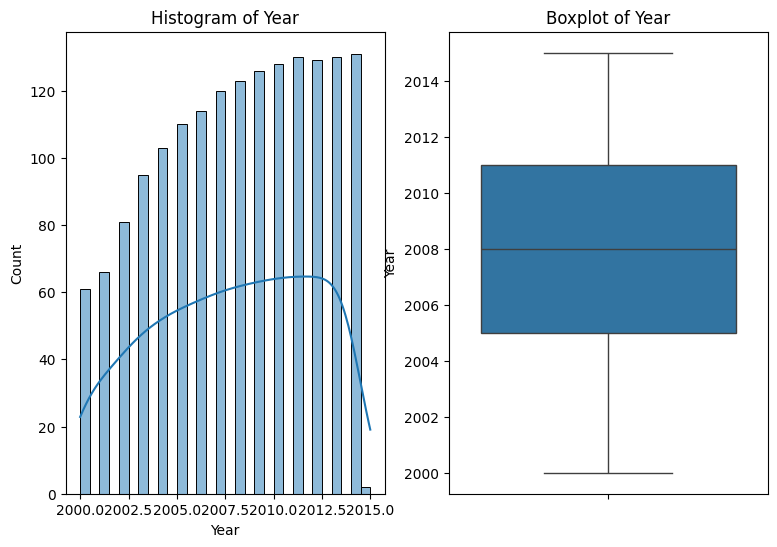

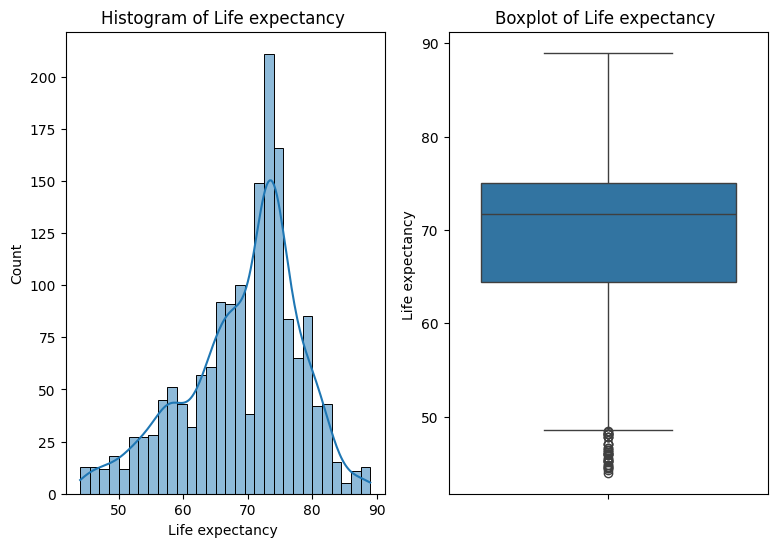

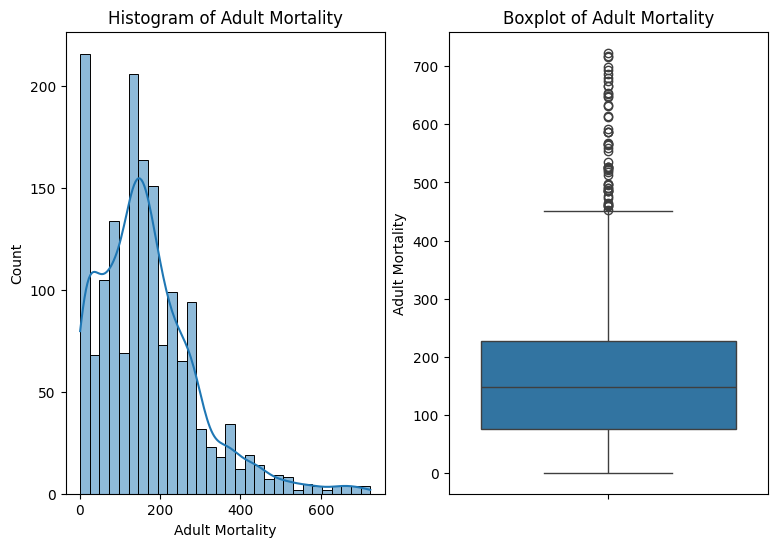

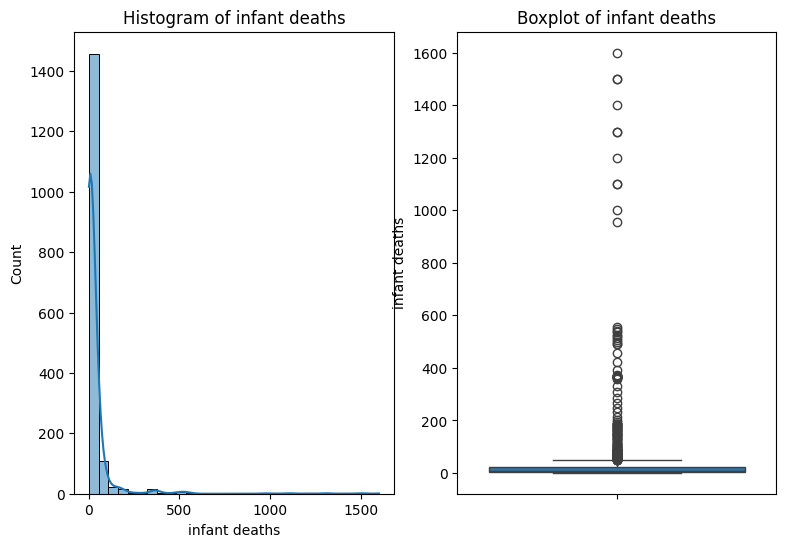

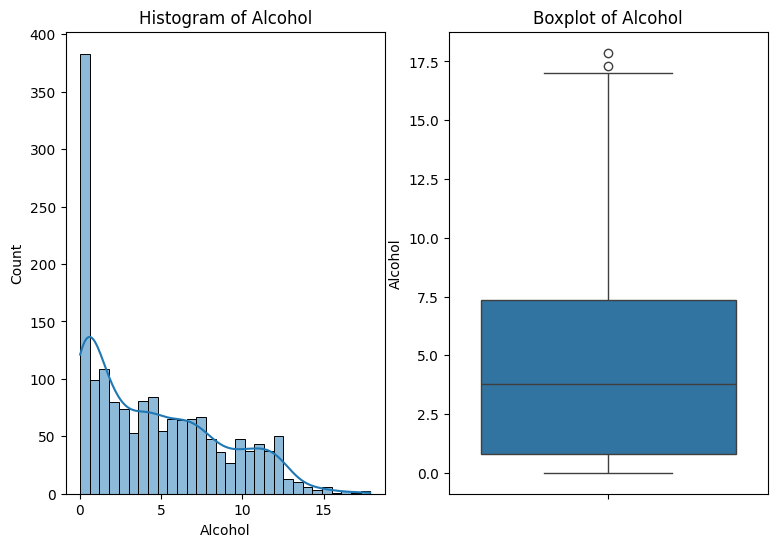

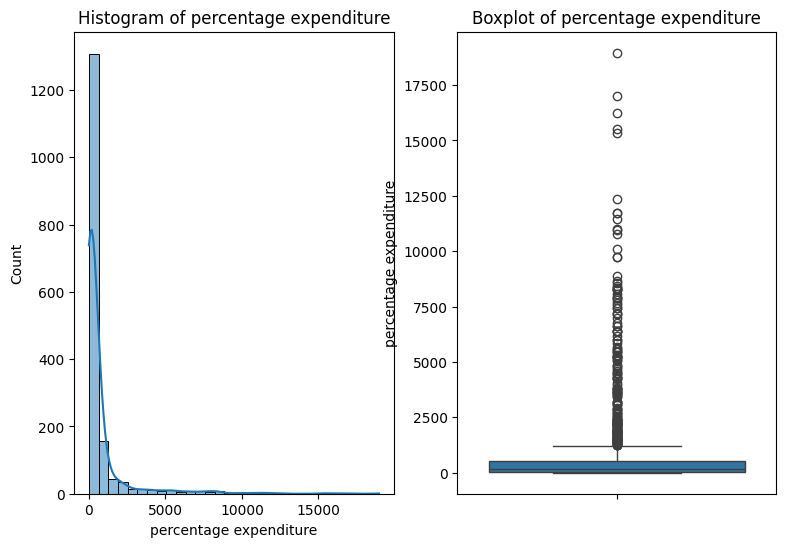

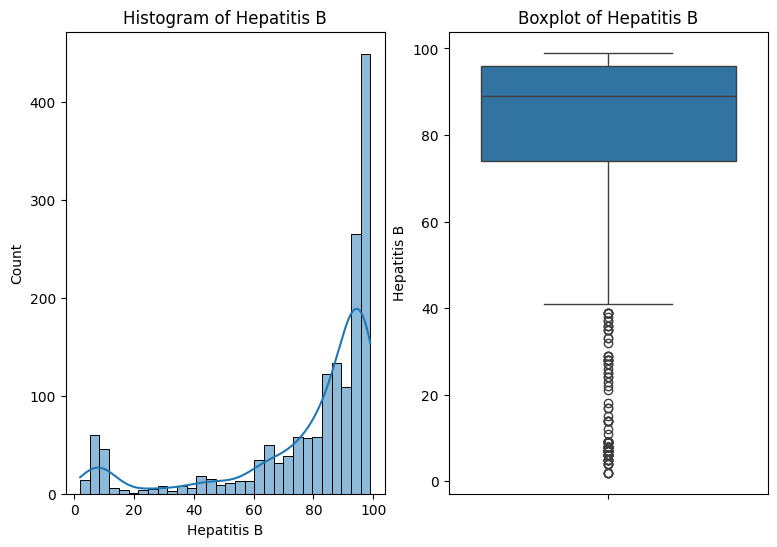

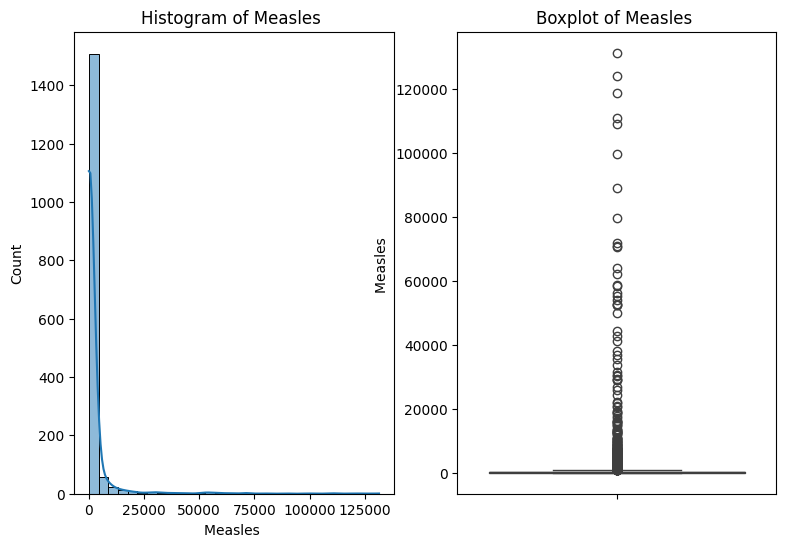

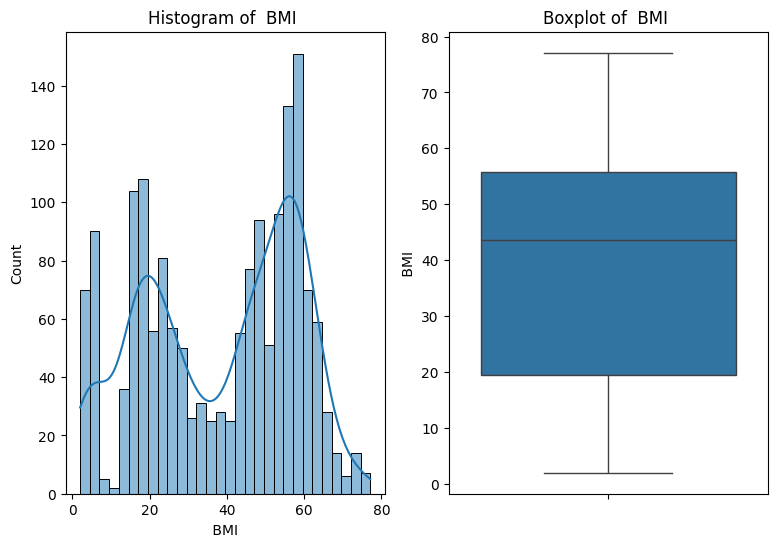

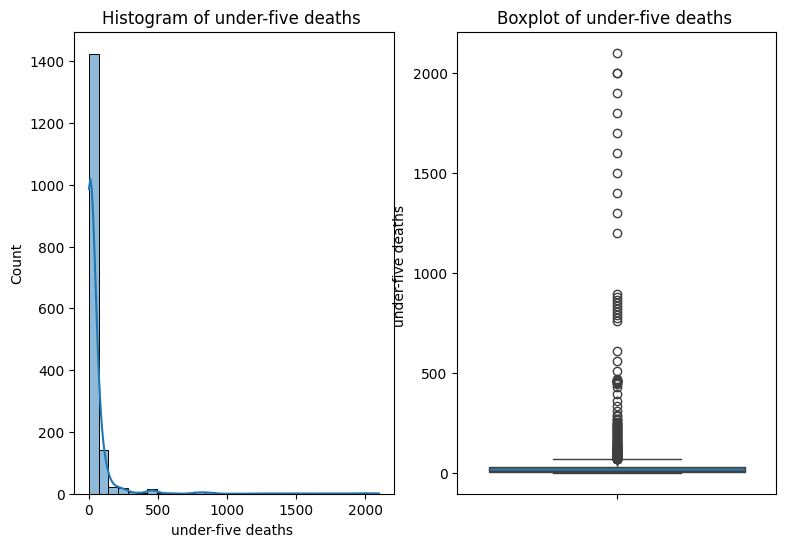

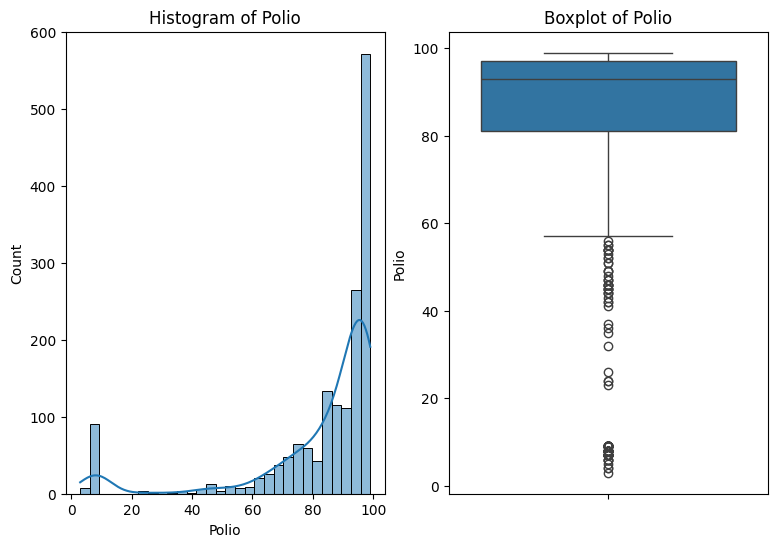

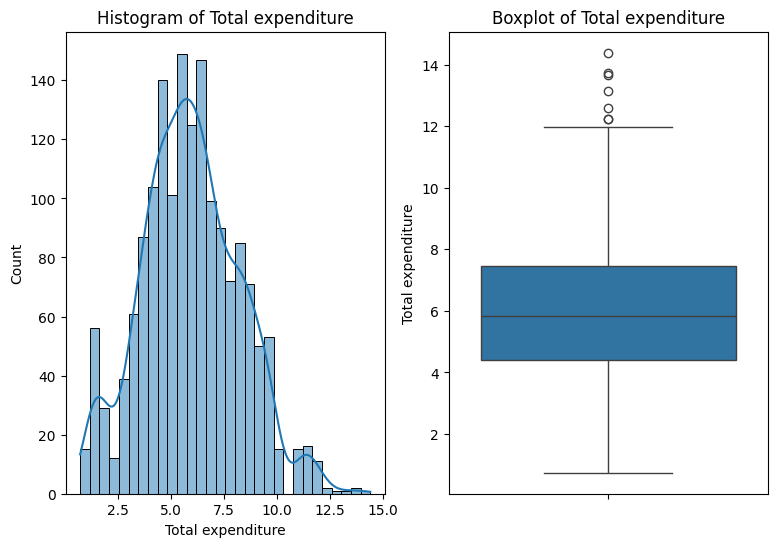

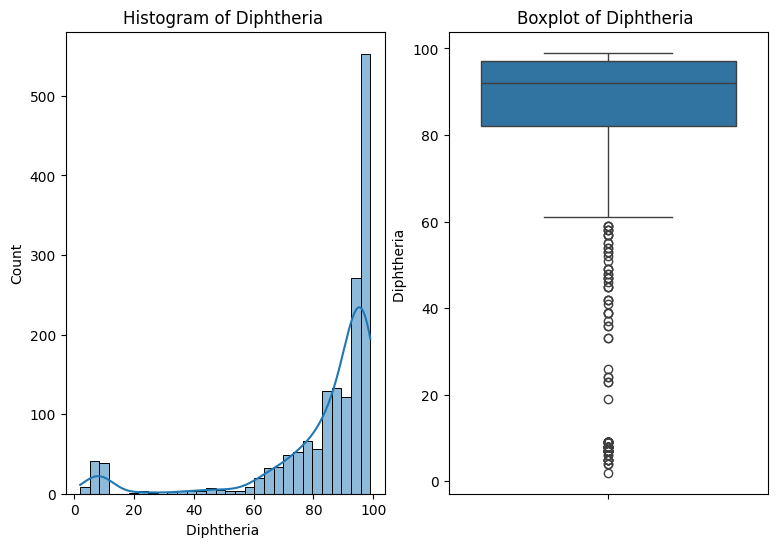

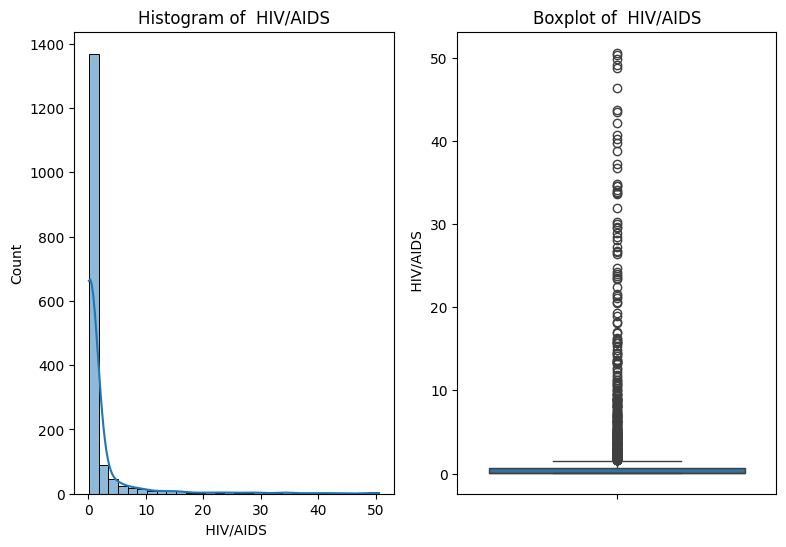

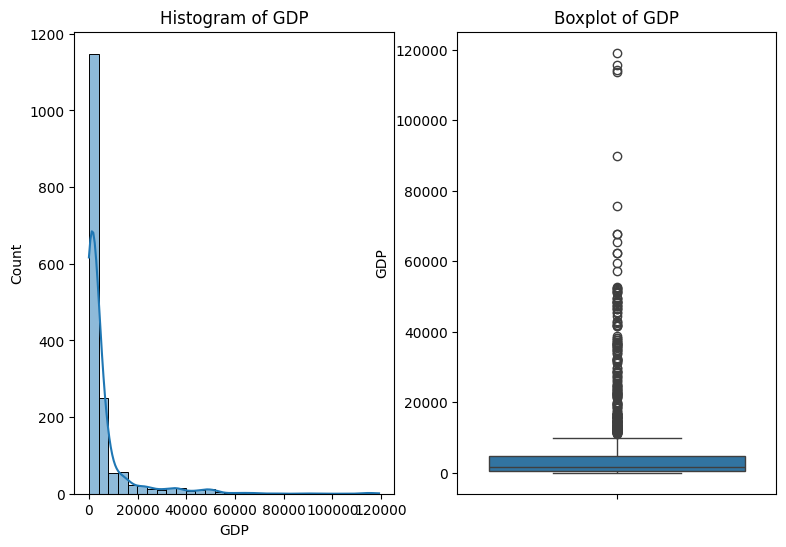

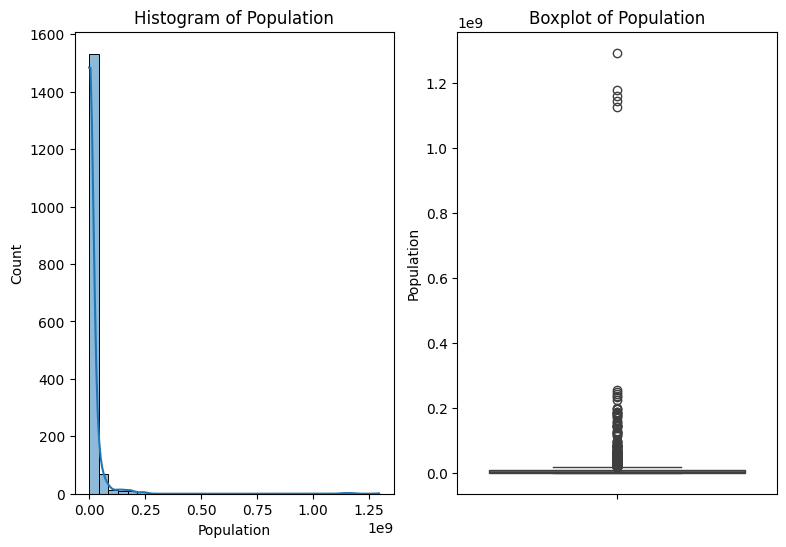

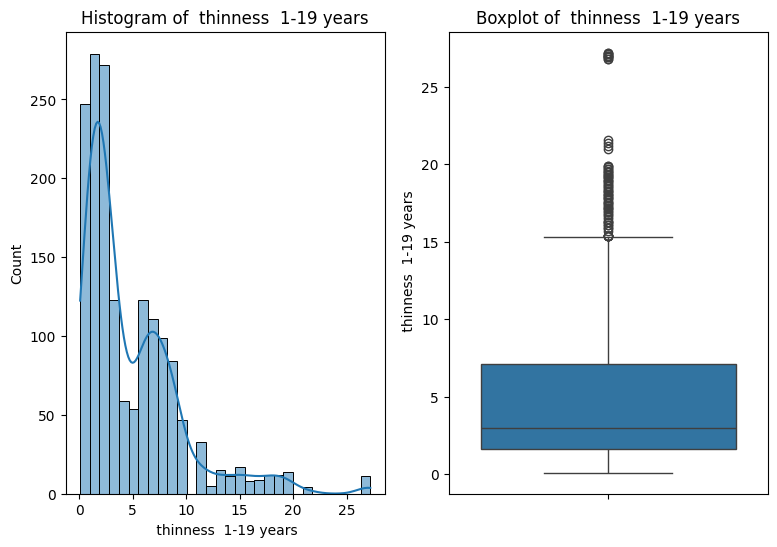

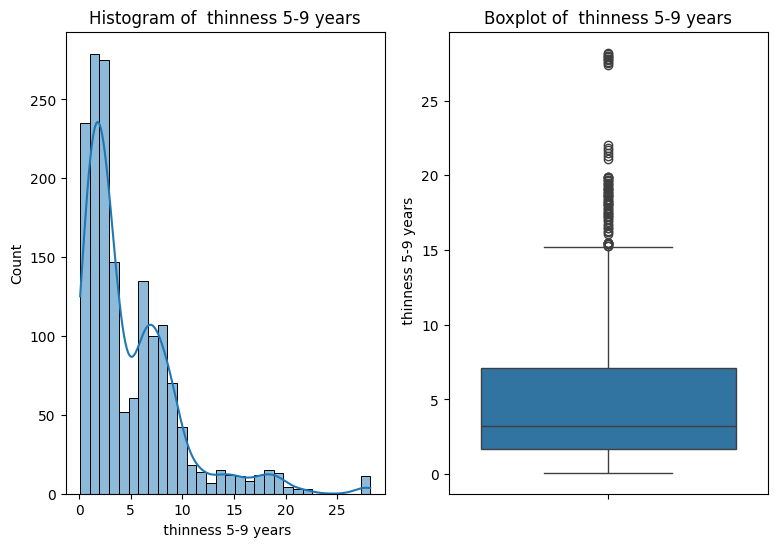

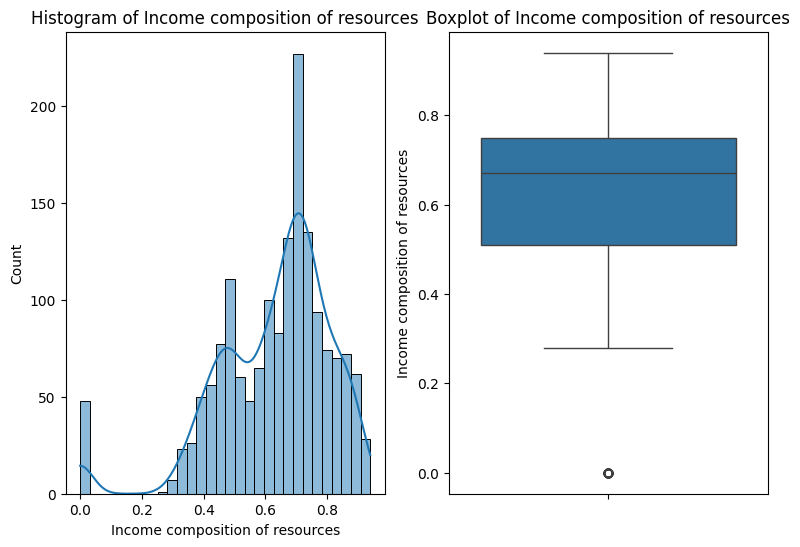

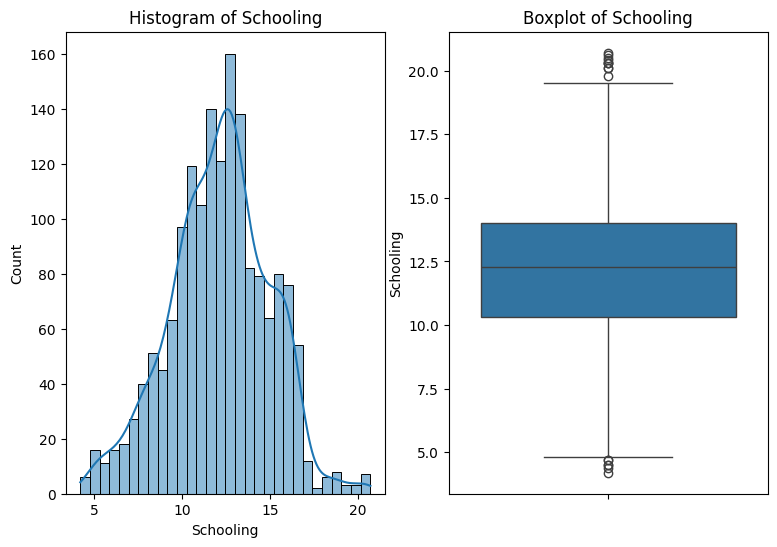

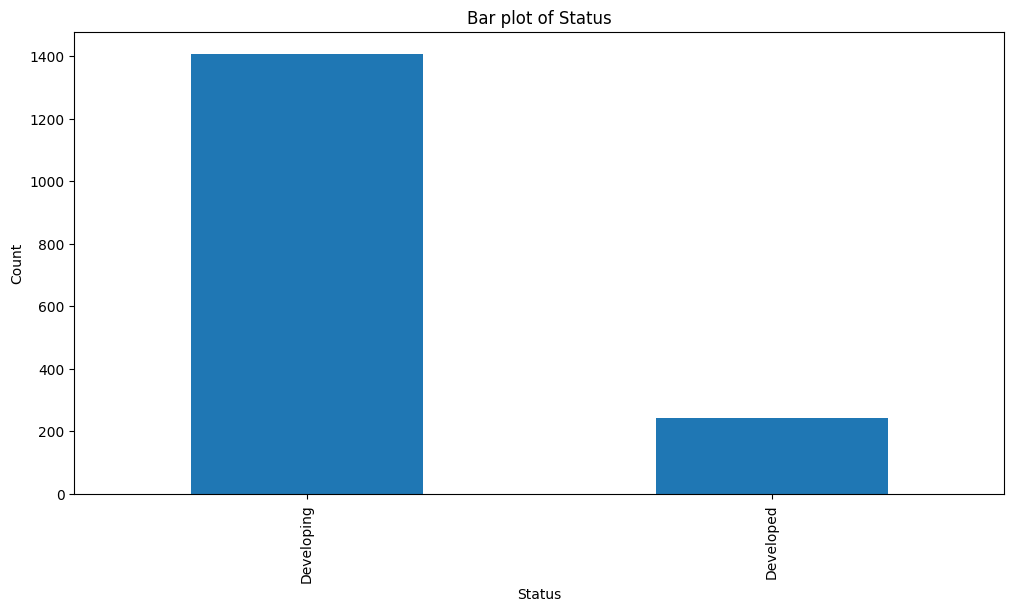

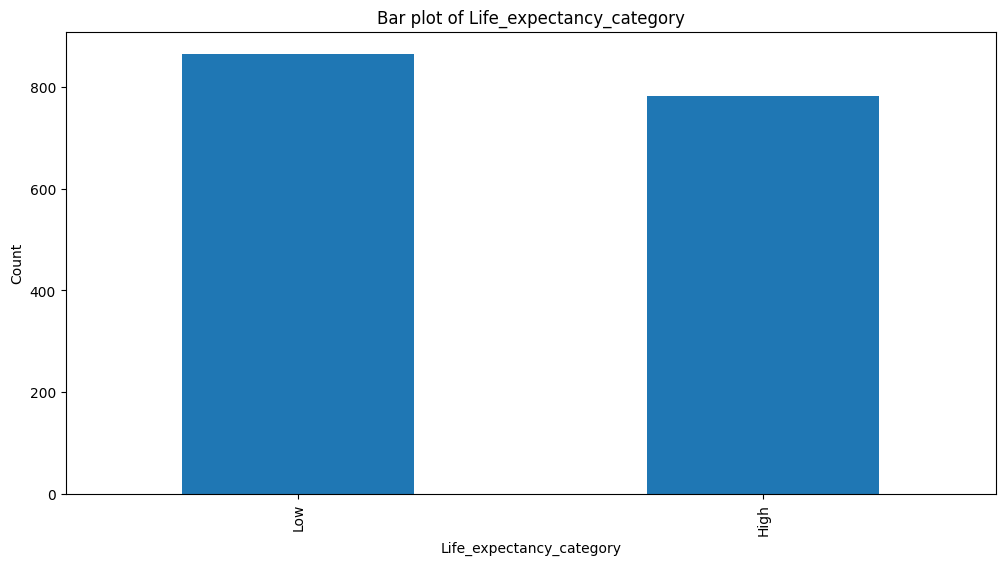

In [70]:
# Univariate analysis for numerical columns
for col in numerical_col:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')


# Univariate analysis for categorical columns (if any)
# Assuming 'categorical_cols' is a list of categorical column names in your DataFrame
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

##Bivariate Analysis

High Correlation Pivot Table:
                           Column1                          Column2  \
3                    infant deaths               under-five deaths    
4           percentage expenditure                              GDP   
5             thinness  1-19 years               thinness 5-9 years   
6  Income composition of resources                        Schooling   
2                 Life expectancy                         Schooling   
1                 Life expectancy   Income composition of resources   
0                 Life expectancy                   Adult Mortality   

   Correlation  
3     0.996826  
4     0.959160  
5     0.927913  
6     0.785125  
2     0.727630  
1     0.720907  
0    -0.702523  


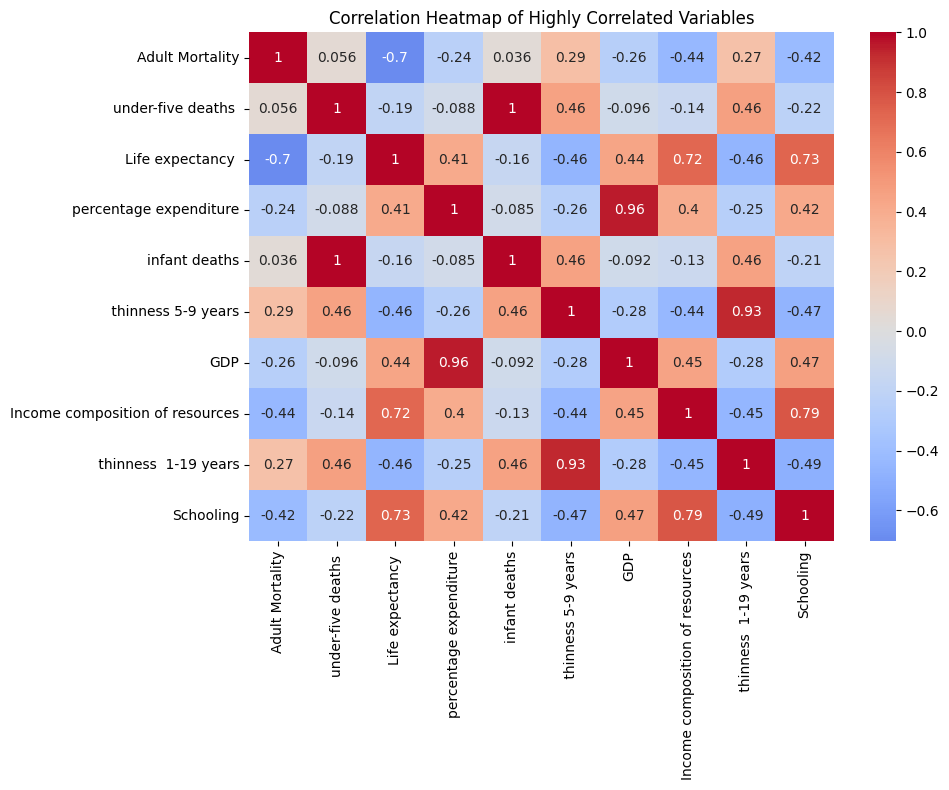

In [71]:
def create_high_correlation_pivot_table(data, correlation_threshold=0.7):
    # Ensure we're working with numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    numeric_data = data[numeric_cols]

    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Mask the lower triangle to avoid duplicate checks (symmetry)
    mask = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=-1)

    # Find highly correlated pairs (absolute correlation above the threshold)
    high_correlation_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.loc[col1, col2]

            # Only add pairs where the absolute correlation is above the threshold
            if abs(correlation) >= correlation_threshold:
                high_correlation_pairs.append({
                    'Column1': col1,
                    'Column2': col2,
                    'Correlation': correlation
                })

    # Convert the list of high correlation pairs to a DataFrame
    correlation_df = pd.DataFrame(high_correlation_pairs)

    # Sort the DataFrame by absolute correlation value in descending order
    correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
    correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop(columns='Abs_Correlation')

    return correlation_df

# Example usage:
# Assuming 'df' is your DataFrame
correlation_df = create_high_correlation_pivot_table(df)
print("High Correlation Pivot Table:")
print(correlation_df)

# Optional: Visualize the heatmap for highly correlated variables
if not correlation_df.empty:
    # Select columns with high correlation
    high_corr_cols = list(correlation_df['Column1']) + list(correlation_df['Column2'])
    high_corr_cols = list(set(high_corr_cols))  # Remove duplicates

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[high_corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Highly Correlated Variables')
    plt.tight_layout()
    plt.show()
else:
    print("No correlations exceed the threshold.")

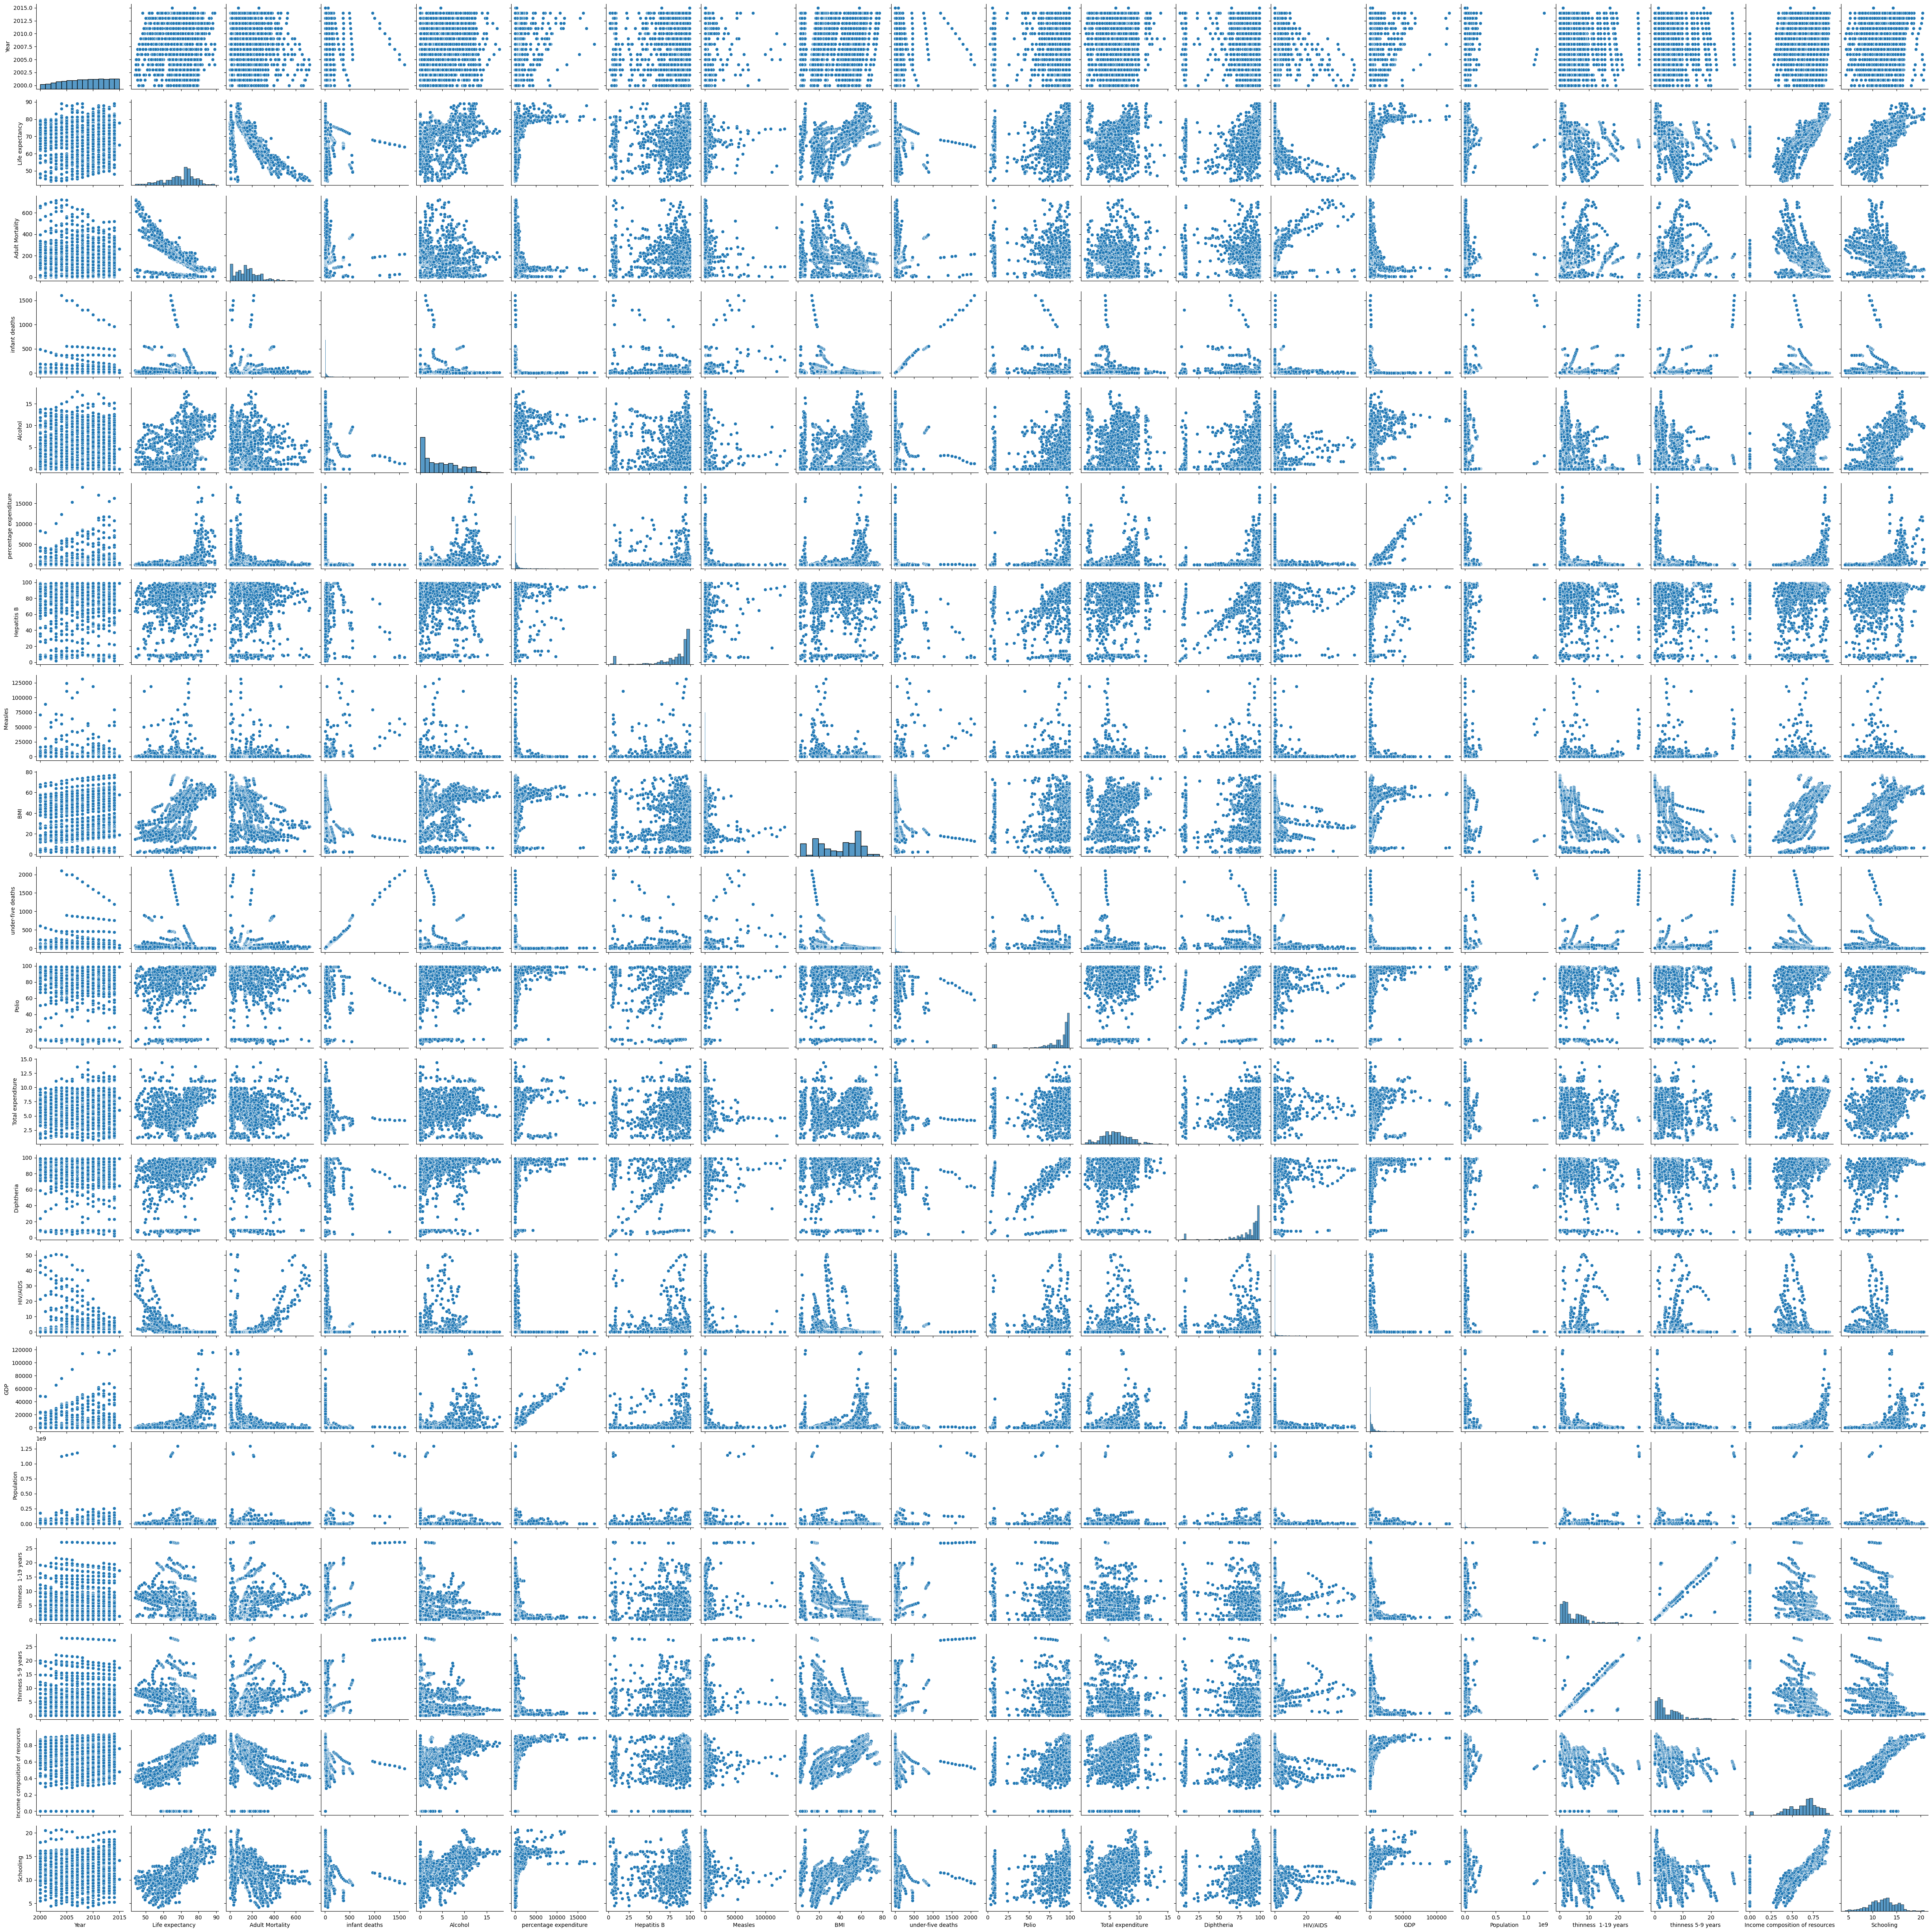

In [116]:
# prompt: give me the code to show pairplots

# Assuming 'df' is your DataFrame and you want pairplots for all numerical columns
sns.pairplot(df[numerical_col])
plt.show()

In [72]:
# prompt: write code to show all numerical and categorical data
# Display numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
categorical_cols

Numerical Columns:
Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Categorical Columns:


Index(['Status', 'Life_expectancy_category'], dtype='object')

In [73]:
import warnings
warnings.filterwarnings('ignore')

## 2.3 Model Building

## OLS Regression

In [74]:
df['Status_Developed'] = df['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
df['Status_Developed'].value_counts()

Status_Developed
0    1407
1     242
Name: count, dtype: int64

In [75]:
df['Status_Developing'] = df['Status'].apply(lambda x: 1 if x == 'Developing' else 0)
df['Status_Developing'].value_counts()

Status_Developing
1    1407
0     242
Name: count, dtype: int64

In [76]:
# Drop the 'Status' column
df = df.drop('Status', axis=1)

In [77]:
df.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0                      71         65.0      1154   19.1                  83   
1                      73         62.0       492   18.6                  86   
2                      73         64.0       430   18.1                  89   
3                      78         67.0      2787   17.6                  93   
4                       7         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS     GDP  Population  \
0    6.0               8.16         65.0        0.1  584.26  33736494.0   
1   58.0               8.18         62.0        0.1  612.70    327582.0   
2   62.0               8.13         64.0        0.1  631.74  31731688.0   
3   67.0               8.52         67.0        0.1  669.96   3696958.0   
4   68.0               7.87         68.0        0.1   63.54   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling Life_expectancy_category  \
0                             0.48       10.1                      Low   
1                             0.48       10.0                      Low   
2                             0.47        9.9                      Low   
3                             0.46        9.8                      Low   
4                             0.45        9.5                      Low   

   Status_Developed  Status_Developing  
0                 0                  1  
1                 0                  1  
2                 0                  1  
3                 0                  1  
4                 0                  1

In [78]:
# Define independent variables (X) and dependent variables (Y)
X = df.drop(['Life expectancy ', 'Life_expectancy_category'], axis=1)  # Drop target columns
y_continuous = df['Life expectancy ']  # For OLS
y_binary = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)  # For Logit

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

In [79]:
y_continuous.shape

(1649,)

In [80]:
y_binary.shape

(1649,)

In [97]:
X_train, X_test, y_train_continuous, y_test_continuous = train_test_split(X, y_continuous, test_size=0.2, random_state=42)  # For OLS
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)  # For Logit


In [98]:
# OLS Regression
ols_model = sm.OLS(y_continuous, X).fit()

# Print OLS summary
print(ols_model.summary())

# Predict with OLS model
y_pred_ols = ols_model.predict(X)

# Calculate RMSE and R-squared
rmse_ols = np.sqrt(mean_squared_error(y_continuous, y_pred_ols))
r2_ols = r2_score(y_continuous, y_pred_ols)

print(f"OLS RMSE: {rmse_ols}")
print(f"OLS R-squared: {r2_ols}")

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:32:16   Log-Likelihood:                -4419.4
No. Observations:                1649   AIC:                             8881.
Df Residuals:                    1628   BIC:                             8994.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Logit Regression

In [104]:
# Logit Regression
logit_model = sm.Logit(y_binary, X).fit()

# Print Logit summary
print(logit_model.summary())

# Predict with Logit model
y_pred_logit = logit_model.predict(X)
y_pred_logit_class = (y_pred_logit >= 0.5).astype(int)  # Convert probabilities to binary classification

# Calculate accuracy
accuracy_logit = accuracy_score(y_binary, y_pred_logit_class)
print(f"Logit Accuracy: {accuracy_logit}")

# Confusion matrix
conf_matrix = confusion_matrix(y_binary, y_pred_logit_class)
print(f"Confusion Matrix:\n{conf_matrix}")

Optimization terminated successfully.
         Current function value: 0.293884
         Iterations 11
                              Logit Regression Results                              
Dep. Variable:     Life_expectancy_category   No. Observations:                 1649
Model:                                Logit   Df Residuals:                     1628
Method:                                 MLE   Df Model:                           20
Date:                      Tue, 17 Dec 2024   Pseudo R-squ.:                  0.5752
Time:                              01:34:16   Log-Likelihood:                -484.61
converged:                             True   LL-Null:                       -1140.9
Covariance Type:                  nonrobust   LLR p-value:                5.952e-266
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const            

In [117]:
# Calculate additional metrics (precision, recall)
from sklearn.metrics import classification_report

# Ensure you are using predictions on the test set
y_pred_logit_test = logit_model.predict(X_test)  # Predict on X_test
y_pred_logit_class_test = (y_pred_logit >= 0.5).astype(int)  # Convert probabilities to binary classification

# Now use the test set predictions for the classification report
print(classification_report(y_binary, y_pred_logit_class))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       866
           1       0.84      0.88      0.86       783

    accuracy                           0.86      1649
   macro avg       0.86      0.86      0.86      1649
weighted avg       0.86      0.86      0.86      1649



## ROC Curve for Logit Regression

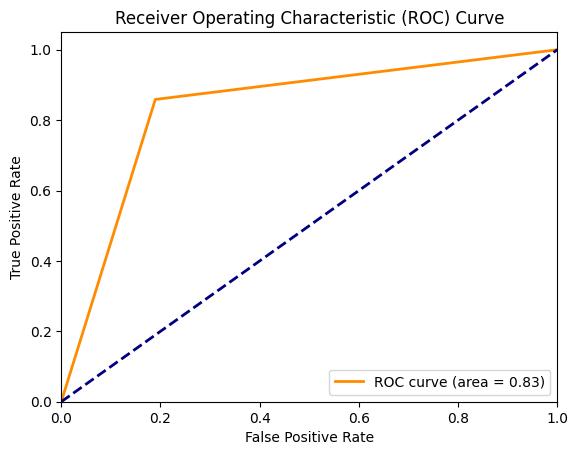

In [107]:
# ROC Curve for Logit Regression
# Ensure you are using predictions for the test set only

# Predict probabilities for the test set
y_pred_logit_test = logit_model.predict(X_test)

# Convert probabilities to binary classification for the test set
y_pred_logit_class_test = (y_pred_logit_test >= 0.5).astype(int)

# Now use the test set predictions for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_logit_class_test)  # Use y_test and y_pred_logit_test
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve (rest of the code remains the same)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Visualization

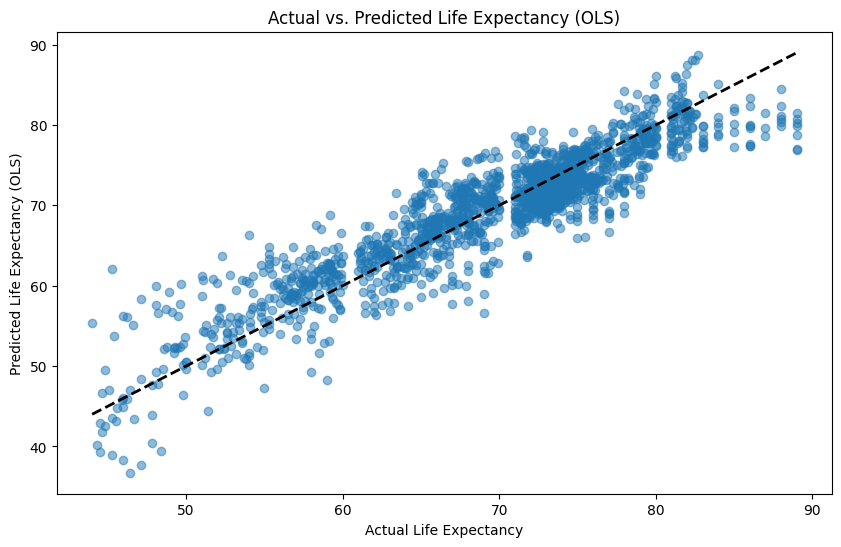

In [108]:
# prompt: For OLS, create visualizations to compare the predicted life expectancy
# values with actual values

# Visualization for OLS
plt.figure(figsize=(10, 6))
plt.scatter(y_continuous, y_pred_ols, alpha=0.5)
plt.plot([y_continuous.min(), y_continuous.max()], [y_continuous.min(), y_continuous.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (OLS)')
plt.title('Actual vs. Predicted Life Expectancy (OLS)')
plt.show()

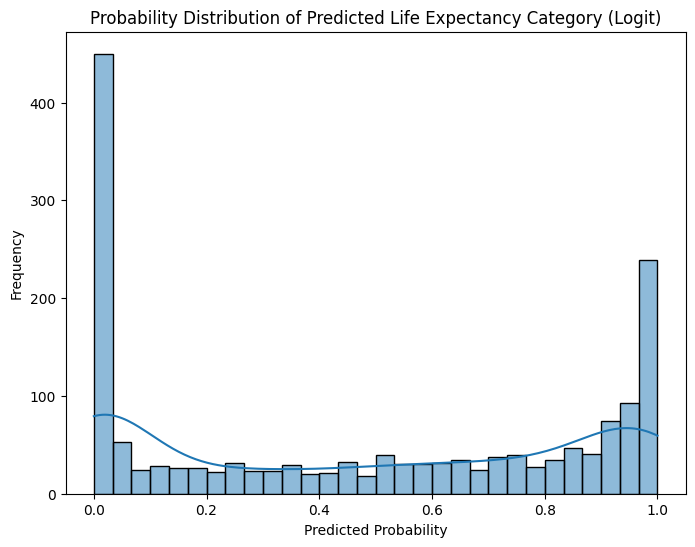

In [112]:
# prompt: • For Logit, create visualizations to evaluate the classification model’s performance, such as confusion matrix, ROC curve, and probability distributions.

# Probability Distribution for Logit Model
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_logit, kde=True, bins=30)
plt.title('Probability Distribution of Predicted Life Expectancy Category (Logit)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


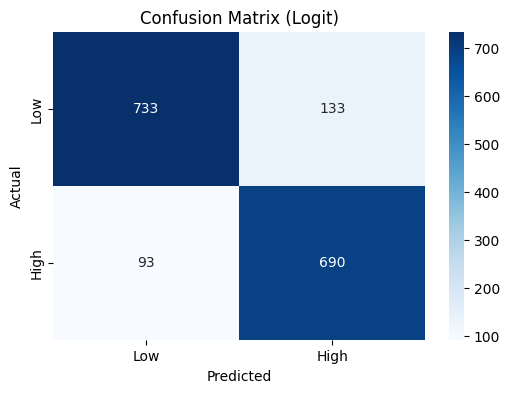

In [111]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logit)')
plt.show()

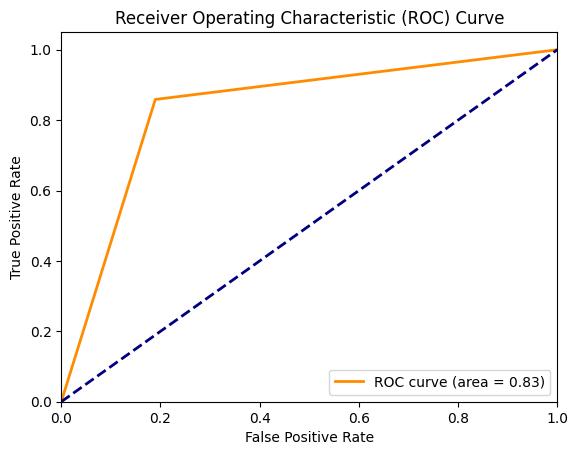

In [115]:

# Now use the test set predictions for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_logit_class_test)  # Use y_test_binary and y_pred_logit_class_test
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Report: Life Expectancy Prediction

## 1. Introduction

This report documents the analysis and modeling of life expectancy data using Ordinary Least Squares (OLS) regression and Logit regression. The goal is to predict life expectancy and categorize it as 'High' or 'Low' based on various factors.  The analysis was performed in a Google Colab environment.

## 2. Methodology

**2.1 Data Loading and Preprocessing:**

* The dataset, 'updated_life_expectancy_data.csv', was loaded into a Pandas DataFrame.

* Missing value handling: Rows with missing values were removed.  A more robust approach would involve imputation techniques in a real-world scenario.  

* Data Transformation:  Float values in the 'percentage expenditure' column were converted to absolute values and then to integers.

* Zero Value Handling: Zeros in specific columns (identified in the code) were replaced with the median of the respective column, excluding zero values. This mitigates the effect of outliers. Found the variables which are skewed and normally distributed by using Shapiro-Wilk test for normality and set the thresholds to 0.05 for normally distributed data and 0.5 for skewed data.

* Feature Engineering: Two new binary features, 'Status_Developed' and 'Status_Developing', were created from the 'Status' column using lambda functions.  The original 'Status' column was subsequently dropped.

* Data Splitting: The dataset was split into training and testing sets (80/20 split) with a random state of 42, ensuring reproducibility.

**2.2 Exploratory Data Analysis (EDA):**

* **Univariate Analysis:** Histograms, boxplots, and bar charts were used to visualize the distributions of numerical and categorical variables, respectively.  The code included loops to iterate through the relevant columns for visualization.

* **Bivariate Analysis:**  The `create_high_correlation_pivot_table` function was used to identify and display pairs of highly correlated numerical variables (correlation coefficient >= 0.7).  A heatmap visualization highlighted these correlations.  This helps in identifying potential multicollinearity issues. Conducted pairplots to visualize the relationships between numerical variables.

* **Normality Tests:** Shapiro-Wilk tests and skewness measures were used to assess normality for the specified columns. Histograms and Q-Q plots were generated to provide visual confirmation of the normality test results.


**2.3 Model Building:**

* **OLS Regression:** An OLS regression model was fitted using the `statsmodels` library. A constant was added to the independent variables to account for the intercept term.

* **Logit Regression:** A Logit regression model was built using the `statsmodels` library. Predictions were generated, and a threshold of 0.5 was used to classify life expectancy into 'High' or 'Low' categories.


**2.4 Model Evaluation:**

* **OLS Regression:** The model was evaluated using RMSE and R-squared, which quantify model fit and variance explained, respectively.

* **Logit Regression:**  Evaluation metrics included: accuracy, confusion matrix, classification report (precision, recall, F1-score), and the Receiver Operating Characteristic (ROC) curve with its Area Under the Curve (AUC).


## 3. Findings

**3.1 OLS Regression:**

* The OLS models performance can be assessed using the reported RMSE and R-squared values.

                       OLS Regression Results                            
==============================================================================

Dep. Variable:       Life expectancy    R-squared:                       0.839

Model:                            OLS   Adj. R-squared:                  0.837

Method:                 Least Squares   F-statistic:                     424.0

Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00

Time:                        01:32:16   Log-Likelihood:                -4419.4

No. Observations:                1649   AIC:                             8881.

Df Residuals:                    1628   BIC:                             8994.

Df Model:                          20                                         

Covariance Type:            nonrobust                                         

=================================================================================================

* The model summary shows the significance of various predictors. Like coefficient interpretations and influences on life expectancy from the summary.


                                      coef    std err          t      P>|t|      [0.025      0.975]

---------------------------------------------------------------------------------------------------

const                             207.9528     30.752      6.762      0.000     147.635     268.271

Year                               -0.1288      0.023     -5.592      0.000      -0.174      -0.084

Adult Mortality                    -0.0161      0.001    -17.108      0.000      -0.018      -0.014

infant deaths                       0.0903      0.010      8.622      0.000       0.070       0.111

Alcohol                            -0.1362      0.033     -4.069      0.000      -0.202      -0.071

percentage expenditure              0.0003      0.000      1.753      0.080   -3.73e-05       0.001

Hepatitis B                        -0.0034      0.004     -0.756      0.450      -0.012       0.005

Measles                         -1.024e-05   1.07e-05     -0.960      0.337   -3.12e-05    1.07e-05

 BMI                                0.0316      0.006      5.318      0.000       0.020       0.043

under-five deaths                  -0.0677      0.008     -8.922      0.000      -0.083      -0.053

Polio                               0.0055      0.005      1.071      0.284      -0.005       0.016

**3.2 Logit Regression:**

* Model accuracy: 0.8629472407519709

* Confusion matrix: (include confusion matrix from output).  Analyze the number of true positives, true negatives, false positives, and false negatives.
the confusion matrix breakdown:

True Positives (TP) = 690

The model correctly predicted 'High' life expectancy.
True Negatives (TN) = 733

The model correctly predicted 'Low' life expectancy.
False Positives (FP) = 133

The model incorrectly predicted 'High' life expectancy when it was actually 'Low'.
False Negatives (FN) = 93

The model incorrectly predicted 'Low' life expectancy when it was actually 'High'.

* Classification report:

 precision    recall  f1-score   support

           0       0.89      0.85      0.87       866

           1       0.84      0.88      0.86       783

    accuracy                           0.86      1649

   macro avg       0.86      0.86      0.86      1649

weighted avg       0.86      0.86      0.86      1649

* ROC AUC: [0.83] - The ROC curve shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for your logistic regression model. The Area Under the Curve (AUC = 0.83) indicates strong model performance, significantly better than random guessing. The curve bending towards the top-left corner reflects the model's good ability to distinguish between 'High' and 'Low' life expectancy.  An AUC of 0.5 suggests no discrimination; higher values indicate better discrimination.

* Significant features:


 Logit Regression Results                              

====================================================================================

Dep. Variable:     Life_expectancy_category   No. Observations:                 1649

Model:                                Logit   Df Residuals:                     1628

Method:                                 MLE   Df Model:                           20

Date:                      Tue, 17 Dec 2024   Pseudo R-squ.:                  0.5752

Time:                              01:34:16   Log-Likelihood:                -484.61

converged:                             True   LL-Null:                       -1140.9

Covariance Type:                  nonrobust   LLR p-value:                5.952e-266


                                      coef    std err          z      P>|z|      [0.025      0.975]


const                              25.1104   3.74e+07   6.72e-07      1.000   -7.33e+07    7.33e+07

Year                               -0.0221      0.021     -1.036      0.300      -0.064       0.020

Adult Mortality                    -0.0127      0.001     -9.880      0.000      -0.015      -0.010

infant deaths                       0.0517      0.043      1.201      0.230      -0.033       0.136

Alcohol                            -0.0661      0.033     -2.020      0.043      -0.130      -0.002

percentage expenditure              0.0014      0.000      3.435      0.001       0.001       0.002

Hepatitis B                        -0.0035      0.004     -0.781      0.435      -0.012       0.005

Measles                          3.563e-05   1.62e-05      2.204      0.028    3.94e-06    6.73e-05

BMI                               -0.0058      0.006     -1.025      0.305      -0.017       0.005

under-five deaths                  -0.0482      0.036     -1.352      0.177      -0.118       0.022




## 4. Insights

 OLS Regression Insights:

 Based on the OLS regression results, several variables significantly influence life expectancy.
 For instance, a negative coefficient for 'Adult Mortality' suggests that higher adult mortality rates are associated with lower life expectancy, which aligns with expectations.  Similarly, 'under-five deaths' shows a strong negative correlation.  The positive coefficient of 'percentage expenditure' on health indicates that increased spending on healthcare corresponds to a higher life expectancy.  Interpret other significant variables in a similar fashion.  The R-squared value suggests the model explains a substantial portion of the variance in life expectancy. The RMSE indicates the average difference between predicted and actual life expectancies.  A lower RMSE indicates a better fit.

 Logit Regression Insights:
 The Logit model effectively classifies life expectancy into 'High' and 'Low' categories. The accuracy score and the AUC of the ROC curve provide strong indications of the model's performance.  Examine the confusion matrix to understand the model's strengths and weaknesses in making specific predictions. The classification report provides more insight into precision, recall, and F1-scores for both classes.  Analyze the significant predictors as we did in OLS; however, the coefficients are log-odds, requiring interpretation within a logistic context.  For example, a positive coefficient means that an increase in the predictor is associated with a higher *probability* of a high life expectancy.  Noteworthy is the fact that the Logit model does not explicitly model the magnitude of life expectancy but categorizes it.

 Comparing Models:
 The OLS model provides continuous predictions of life expectancy, enabling a more granular understanding of the magnitude of the effect of different features.  The Logit model offers a binary classification, which may be suitable when the primary goal is to determine the category ('High' or 'Low') rather than the precise numerical value of life expectancy.  Depending on the specific application, one model might be preferable over the other.

 Significant Variable Effects:
 Compare the effects of significant variables across both models. For example, 'Adult Mortality' negatively impacts both models. Does it have a stronger effect in one model over the other?  This comparison can reveal nuanced aspects of the variables' influence on different aspects of life expectancy prediction (numeric vs. binary).  

 Overall:
 The combination of these models provides a comprehensive picture of the factors affecting life expectancy. The OLS model gives a measure of magnitude whereas the logit model provides probabilities. The visualizations and evaluation metrics help quantify the model performance.  Further analysis using domain knowledge and context could help explain the observed relationships and improve model predictions further.


## 5. Limitations

* Missing data handling: Removing rows with missing values may introduce bias.  Imputation methods should be considered.

* Data Transformations:  The chosen transformation for zero values (replacing them with the median) might not be optimal in all cases and different treatment may be required.

* Multicollinearity: The presence of highly correlated features may influence model coefficients.


## 6. Further Work

* Investigate more advanced imputation methods.
eling techniques.

* Implement more robust feature selection methods to improve model parsimony.

* Use cross-validation to better assess model generalization.

In [120]:
# prompt: give me the python code to convert the notebook to html filefrom nbconvert import HTMLExporter
import nbformat
import os # Import the os module
from nbconvert import HTMLExporter # Import HTMLExporter from nbconvert

# Load the notebook
notebook_path= '/content/drive/MyDrive/Manohar_Projects/FinalProject/life_expectancy_assignment.ipynb'
# Update the output path to include a filename
output_html_path = os.path.join('/content/drive/MyDrive/Manohar_Projects/Assignment/HTML', 'Manohar.html')

# The rest of your code remains the same
with open(notebook_path) as f:
  notebook_content=nbformat.read(f, as_version=4)

#convert to HTML
html_exporter= HTMLExporter()
(body , resources) = html_exporter.from_notebook_node(notebook_content)

#save to HTML file
with open(output_html_path, 'w') as f:
  f.write(body)